In [1]:
!pip --quiet install pydot

In [2]:
conda install python-graphviz


Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


### Load dataset

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("dataset_new.csv", header=None) 

In [5]:
df

0       1       2       3       4       5       6       7       8   \
0      0.0065  0.0130  0.0195  0.0260  0.0325  0.0390  0.0455  0.0520  0.0585   
1      0.0263  0.0526  0.0789  0.1052  0.1316  0.1579  0.1842  0.2105  0.2368   
2      0.0176  0.0352  0.0528  0.0704  0.0881  0.1057  0.1233  0.1409  0.1585   
3      0.0222  0.0444  0.0666  0.0888  0.1110  0.1332  0.1554  0.1776  0.1998   
4      0.0189  0.0379  0.0568  0.0758  0.0947  0.1137  0.1326  0.1516  0.1705   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
19995  0.0639  0.1278  0.1918  0.2557  0.3196  0.3835  0.4474  0.5114  0.5753   
19996  0.0830  0.1659  0.2489  0.3318  0.4148  0.4977  0.5807  0.6637  0.7466   
19997  0.0854  0.1709  0.2563  0.3417  0.4272  0.5126  0.5980  0.6835  0.7689   
19998  0.0648  0.1296  0.1945  0.2593  0.3241  0.3889  0.4537  0.5186  0.5834   
19999  0.3579  0.7158  1.0737  1.4316  1.7895  2.1473  2.5052  2.8631  3.2210   

           9   ...      45      46      47      48      49      50      51  \
0      0.0650  ...  0.0316  0.0368  0.0312  0.0000  0.0316  0.0364  0.0304   
1      0.2631  ...  0.0316  0.0368  0.0312  0.0000  0.0316  0.0364  0.0304   
2      0.1761  ...  0.0316  0.0368  0.0312  0.0312  0.0316  0.0299  0.0304   
3      0.2220  ...  0.0316  0.0307  0.0312  0.0000  0.0360  0.0364  0.0304   
4      0.1895  ...  0.0316  0.0368  0.0312  0.0000  0.0316  0.0364  0.0304   
...       ...  ...     ...     ...     ...     ...     ...     ...     ...   
19995  0.6392  ...  0.0000  0.0000  0.0000  0.0028  0.0284  0.0076  0.0048   
19996  0.8296  ...  0.0000  0.0000  0.0000  0.0028  0.0284  0.0076  0.0048   
19997  0.8543  ...  0.0000  0.0000  0.0000  0.0028  0.0284  0.0076  0.0048   
19998  0.6482  ...  0.0000  0.0000  0.0000  0.0277  0.0284  0.0076  0.0048   
19999  3.5789  ...  0.0000  0.0017  0.0027  0.0033  0.0000  0.0001  0.0034   

           52      53  54  
0      0.0604  0.9960   1  
1      0.0604  0.9960   1  
2      0.0604  0.9957   1  
3      0.0604  0.9900   1  
4      0.0604  0.9862   1  
...       ...     ...  ..  
19995  0.1793  0.9856   0  
19996  0.1793  0.9849   0  
19997  0.1793  0.9825   0  
19998  0.1793  0.9782   0  
19999  0.3056  0.9166   0  

[20000 rows x 55 columns]

In [6]:
#df = df[0:100]

In [7]:
df.shape

(20000, 55)

### Import libraries

In [8]:
import tensorflow as tf
import numpy as np
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape,Dense,Dropout,Activation,Flatten, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau


### Define functions

In [9]:
def normalize_data(data):
    data = np.transpose(data)
    scalar = MinMaxScaler((0,1))
    scalar.fit(data)
    data = scalar.transform(data)
    output = np.transpose(data)
    return output 

### Data preparation and normalization 

In [10]:
classes = ['Low_traffic', 'High_traffic']
num_classes = len(classes) 
in_dim = [2, 13]
X = df.iloc[:,0:26].to_numpy()
Y = df.iloc[:,26:52].to_numpy() 
IPI = df.iloc[:,52].to_numpy()
col = df.iloc[:,53].to_numpy()
Label = df.iloc[:,54].to_numpy()
Label_cat = tf.keras.utils.to_categorical(Label,num_classes)
#X = normalize_data(X)
#Y = normalize_data(Y)
#IPI_max = np.amax(IPI)
#IPI = np.divide(IPI, IPI_max)
# X = np.reshape(X,(X.shape[0], in_dim[0], in_dim[1]))
# Y = np.reshape(Y,(Y.shape[0], in_dim[0], in_dim[1]))


In [11]:
Label

array([1, 1, 1, ..., 0, 0, 0])

In [12]:
Y[0]

array([0.    , 0.    , 0.4992, 0.002 , 0.    , 0.0012, 0.0368, 0.0404,
       0.    , 0.0312, 0.0284, 0.    , 0.0296, 0.0368, 0.0344, 0.    ,
       0.0312, 0.0304, 0.    , 0.0316, 0.0368, 0.0312, 0.    , 0.0316,
       0.0364, 0.0304])

In [13]:
IPI[0]

0.0604

(array([4.86889e+05, 2.37100e+04, 5.19300e+03, 2.31100e+03, 1.10400e+03,
        4.63000e+02, 8.00000e+01, 7.00000e+01, 8.70000e+01, 9.30000e+01]),
 array([2.300000e-03, 4.910370e+00, 9.818440e+00, 1.472651e+01,
        1.963458e+01, 2.454265e+01, 2.945072e+01, 3.435879e+01,
        3.926686e+01, 4.417493e+01, 4.908300e+01]),
 <BarContainer object of 10 artists>)

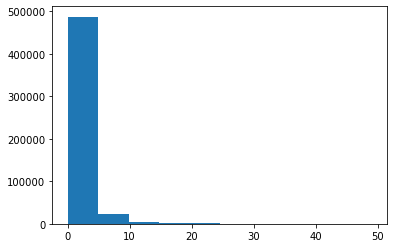

In [14]:
plt.hist(np.array(X).flatten())

### Create training and validation dataset

In [15]:
np.random.seed(seed=int(time.time()))
n_examples = X.shape[0]
n_train = n_examples * 0.7
train_idx = np.random.choice(range(0,n_examples), size=int(n_train), replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test = X[test_idx]
Y_train = Y[train_idx]
Y_test = Y[test_idx]
IPI_train = IPI[train_idx]
IPI_test = IPI[test_idx]
col_train = col[train_idx]
col_test = col[test_idx]
Label_train = Label_cat[train_idx]
Label_test = Label_cat[test_idx]


### Normalization

In [16]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# Y_train = scaler.fit_transform(Y_train)
# X_test = scaler.transform(X_test)
# Y_test = scaler.transform(Y_test)


### Model definition

In [17]:
def get_model(X_shape, Y_shape, IPI_shape, col_shape, classes, verbose):
#def get_model(X_shape, Y_shape, IPI_shape, classes, verbose):

    # model definition for X
    dr = 0.30
    model_X = tf.keras.models.Sequential()
    model_X.add(layers.Reshape((X_shape, 1), input_shape=(X_shape, ) ))
    model_X.add(layers.Conv1D(32, 3, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01)))
    model_X.add(layers.BatchNormalization())
#     model_X.add(layers.Dropout(dr))
    model_X.add(layers.Conv1D(16, 2, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01)))
    model_X.add(layers.Flatten())
    model_X.add(layers.Dense(64, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01)))
    model_X.add(layers.Dropout(dr)) 
    model_X.add(layers.Dense(32, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01))) 
    model_X.add(layers.Dropout(dr)) 
    # modelfeat.add(BatchNormalization()) # was not here

    
    #model defnition for Y 

    model_Y = tf.keras.models.Sequential()
    model_Y.add(layers.Reshape((Y_shape, 1), input_shape=(Y_shape, ) ))
    model_Y.add(layers.Conv1D(256, 3, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01) ))
    model_Y.add(layers.BatchNormalization())
#     model_Y.add(layers.Dropout(dr))
    model_Y.add(layers.Conv1D(128, 2, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01)))
    model_Y.add(layers.Flatten())
    model_Y.add(layers.Dropout(dr)) 
    model_Y.add(layers.Dense(256, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01) )) 
    model_Y.add(layers.Dropout(dr)) 
    model_Y.add(layers.Dense(128, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01))) 
    model_Y.add(layers.Dropout(dr)) 

    #model definition for IPI
    model_IPI = tf.keras.models.Sequential()
    model_IPI.add(layers.Dense(IPI_shape, activation=tf.nn.relu, input_shape=(IPI_shape, )))
    # modelfeat.add(BatchNormalization())
    model_IPI.add(layers.Dense(64, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01))) # was not here
    model_IPI.add(layers.Dropout(dr)) # was not here
    model_IPI.add(layers.Dense(32, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01))) # was not here
    model_IPI.add(layers.Dropout(dr)) # was not there previously
    # modelfeat.add(BatchNormalization()) # was not here

    model_col = tf.keras.models.Sequential()
    model_col.add(layers.Dense(col_shape, activation=tf.nn.relu, input_shape=(col_shape, )))
    # modelfeat.add(BatchNormalization())
    model_col.add(layers.Dense(64, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01))) # was not here
    model_col.add(layers.Dropout(dr)) # was not here
    model_col.add(layers.Dense(32, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01))) # was not here
    model_col.add(layers.Dropout(dr)) # was not there previously
    # modelfeat.add(BatchNormalization()) # was not here
    
    #model concatenation
    merged = tf.keras.layers.Concatenate(axis=1)([model_X.output, model_Y.output, model_IPI.output, model_col.output])
    #merged = tf.keras.layers.Concatenate(axis=1)([model_X.output, model_Y.output, model_IPI.output])
    merged = layers.Dense(256,activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01))(merged)
    merged = layers.Dropout(dr)(merged) 
    merged = layers.Dense(128,activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.01))(merged)
    merged = layers.Dropout(dr)(merged) 
    merged = layers.Dense(len(classes), activation=tf.nn.softmax, name='class_output')(merged)

    #create merged model
    model = tf.keras.models.Model([model_X.input,model_Y.input, model_IPI.input, model_col.input], merged)
    #model = tf.keras.models.Model([model_X.input,model_Y.input, model_IPI.input], merged)
    
    #show merged model
    if(verbose):
        from tensorflow.keras.utils import plot_model
        from IPython.display import Image
        plot_model(model, to_file='model.png', show_shapes=True)
    
    print("--Model created")
    return model
    

--Model created


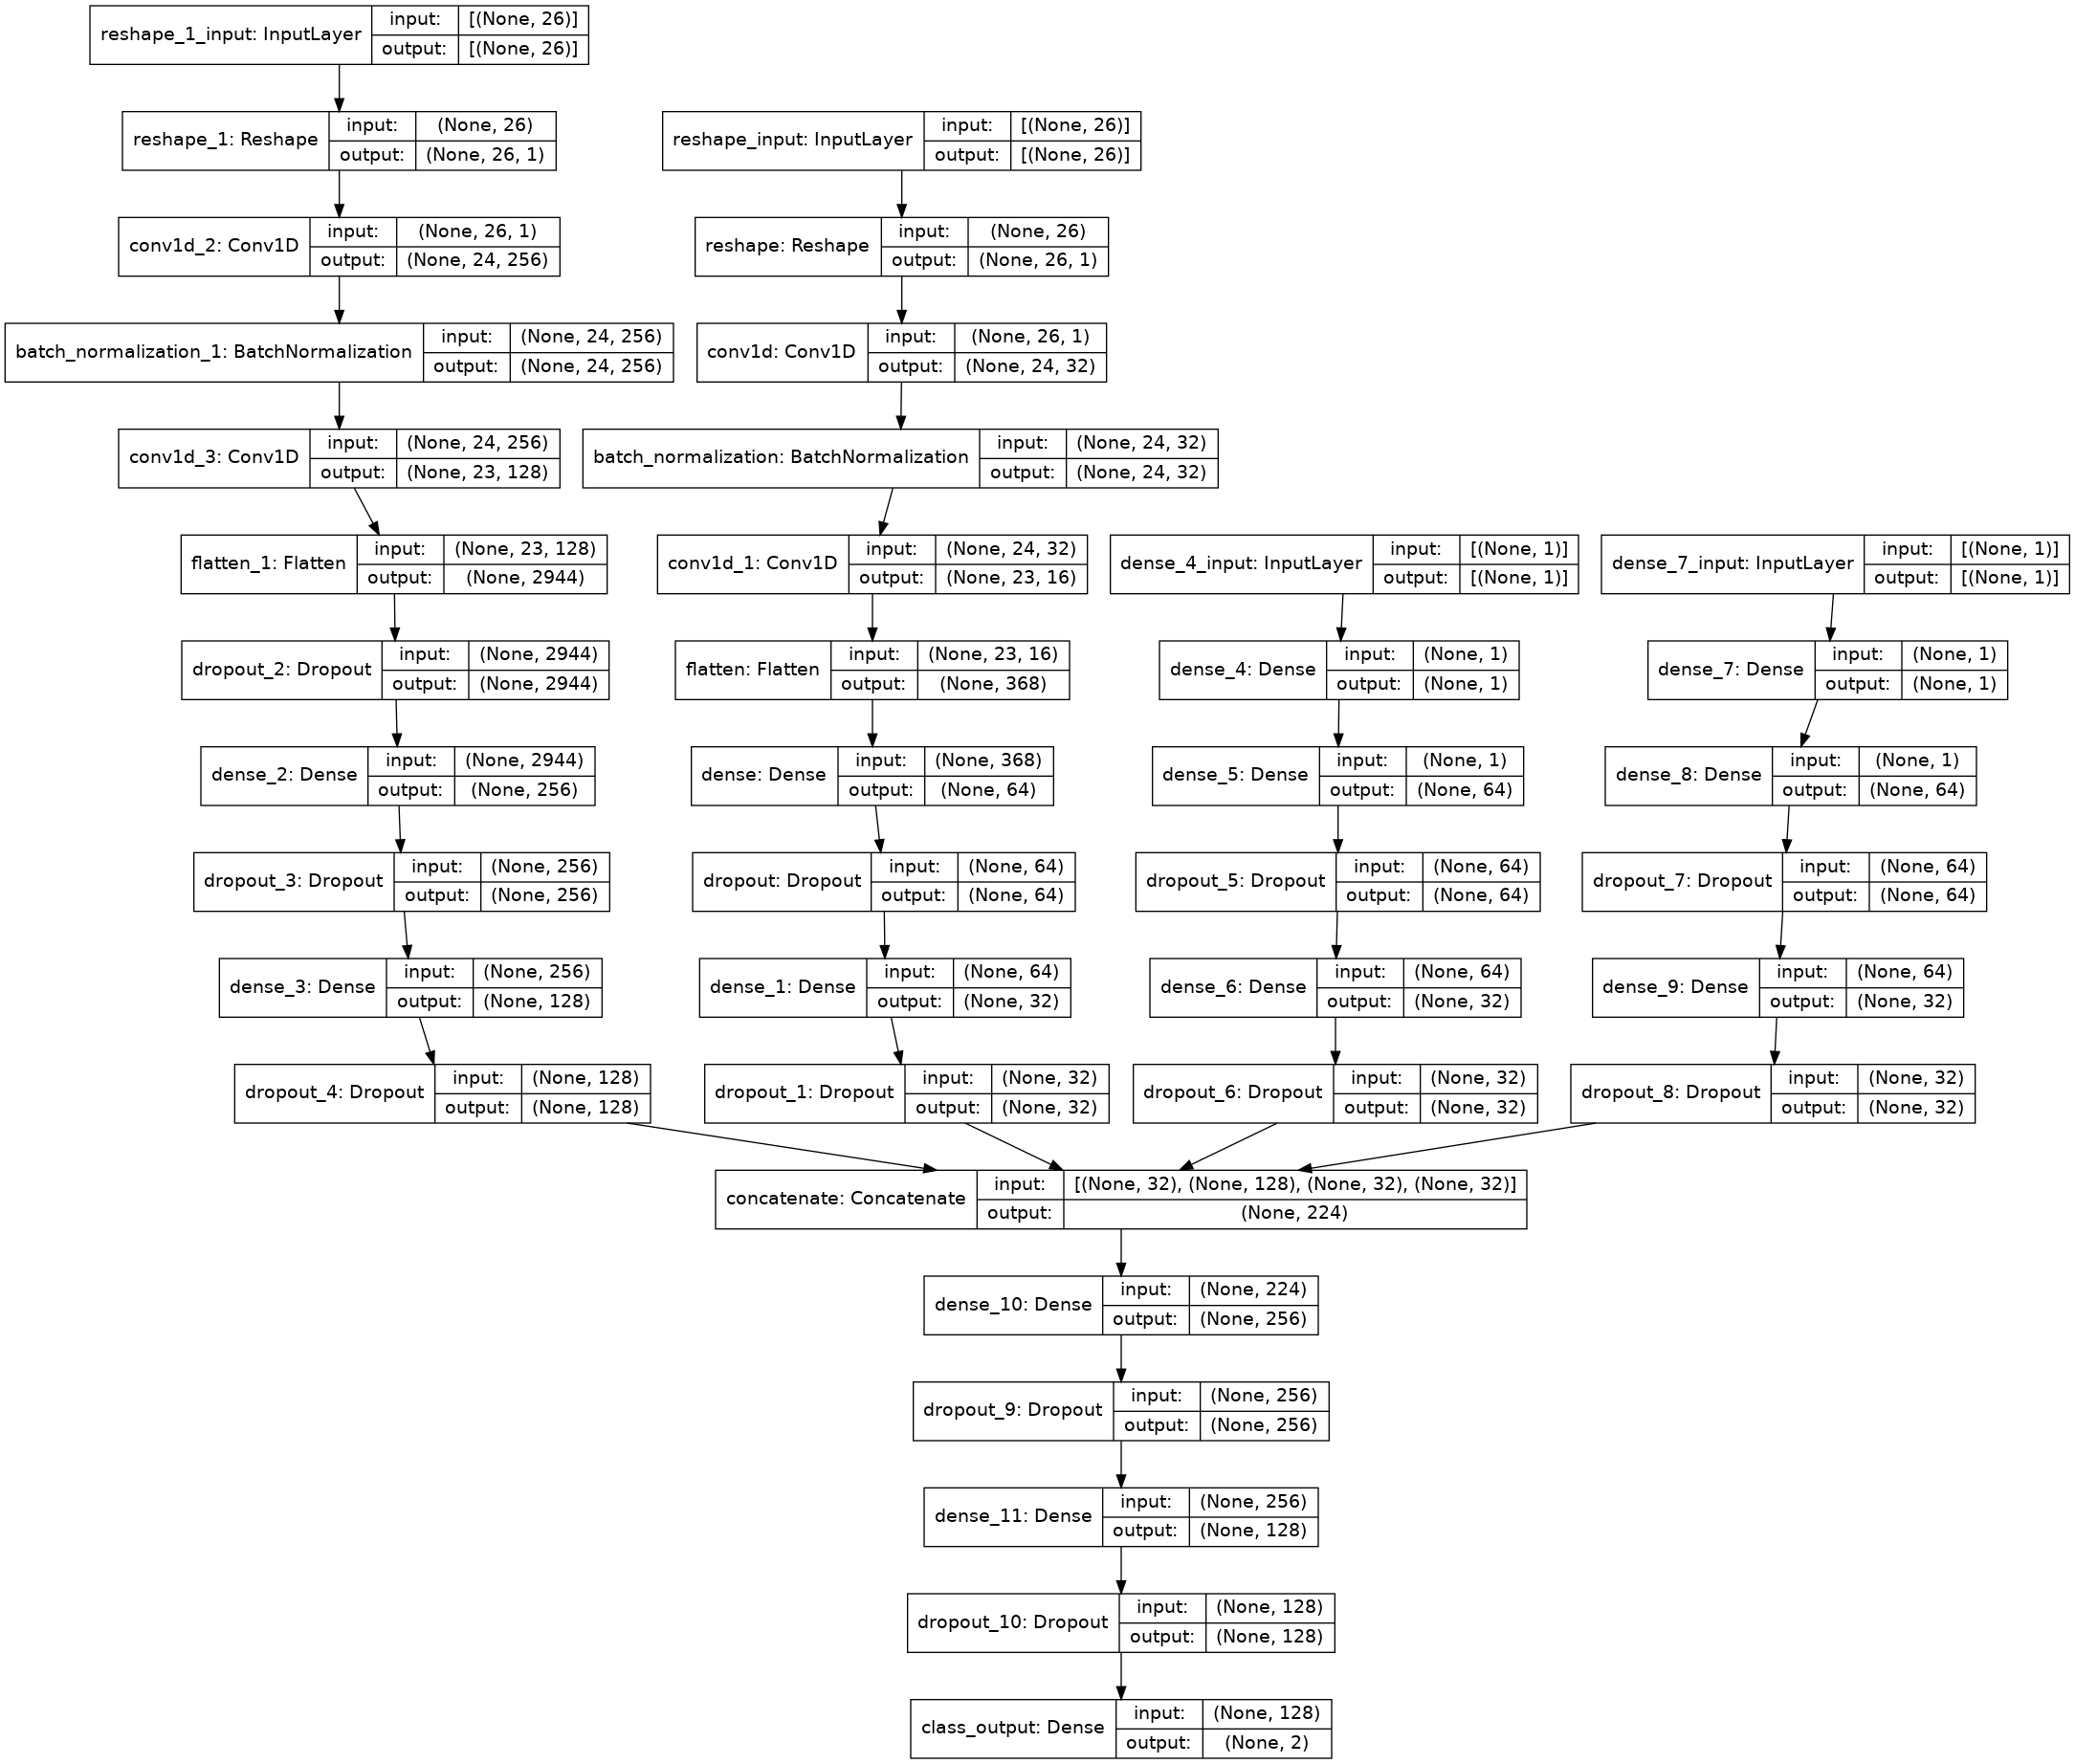

In [18]:
model = get_model(X.shape[1], Y.shape[1], 1, 1, classes, verbose=1)
#model = get_model(X.shape[1], Y.shape[1], 1, classes, verbose=1)

Image(filename='model.png')

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
reshape_1_input (InputLayer)    [(None, 26)]         0                                            
__________________________________________________________________________________________________
reshape_input (InputLayer)      [(None, 26)]         0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 26, 1)        0           reshape_1_input[0][0]            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 26, 1)        0           reshape_input[0][0]              
______________________________________________________________________________________________


### Model compile

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss= 'categorical_crossentropy', metrics=['accuracy']  ) #'mae' RMSprop adam 'acc'

### Model Fitting

In [21]:
savedir = 'model_LTE_WiFi_coexistance_histogram+IPI+col.h5'
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'loss', min_delta = 0, patience = 20, verbose = 0, mode = 'auto')
checkpoint = tf.keras.callbacks.ModelCheckpoint(savedir, monitor = 'loss', verbose = 1, save_best_only = True, mode = 'min')
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, min_delta=0.00001, cooldown=0, min_lr=0.0001)
nb_epoch = 5000
batch_size = 16
history = model.fit(x = [X_train, Y_train, np.transpose(IPI_train), np.transpose(col_train)], y = Label_train ,
                    #x = [X_train, Y_train, np.transpose(IPI_train)], y = Label_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    validation_data = ([X_test, Y_test, np.transpose(IPI_test), np.transpose(col_test)], Label_test), 
                    #validation_data = ([X_test, Y_test, np.transpose(IPI_test)], Label_test), 
                    shuffle=True, 
                    verbose=2,
                    callbacks = [early_stop, checkpoint, reduce_lr_callback] ) 


Epoch 1/5000
875/875 - 39s - loss: 1.0423 - accuracy: 0.9375 - val_loss: 0.2495 - val_accuracy: 0.9590

Epoch 00001: loss improved from inf to 1.04231, saving model to model_LTE_WiFi_coexistance_histogram+IPI+col.h5
Epoch 2/5000
875/875 - 61s - loss: 0.2539 - accuracy: 0.9504 - val_loss: 0.2011 - val_accuracy: 0.9640

Epoch 00002: loss improved from 1.04231 to 0.25391, saving model to model_LTE_WiFi_coexistance_histogram+IPI+col.h5
Epoch 3/5000
875/875 - 66s - loss: 0.2293 - accuracy: 0.9551 - val_loss: 0.2024 - val_accuracy: 0.9655

Epoch 00003: loss improved from 0.25391 to 0.22935, saving model to model_LTE_WiFi_coexistance_histogram+IPI+col.h5
Epoch 4/5000
875/875 - 67s - loss: 0.2191 - accuracy: 0.9576 - val_loss: 0.1800 - val_accuracy: 0.9712

Epoch 00004: loss improved from 0.22935 to 0.21909, saving model to model_LTE_WiFi_coexistance_histogram+IPI+col.h5
Epoch 5/5000
875/875 - 65s - loss: 0.2111 - accuracy: 0.9588 - val_loss: 0.1931 - val_accuracy: 0.9595

Epoch 00005: loss im

### Plot model loss and accuracy

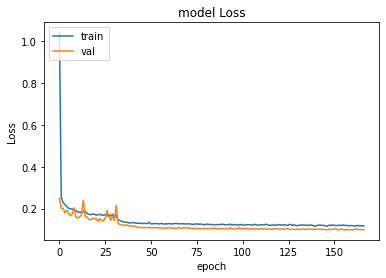

In [22]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


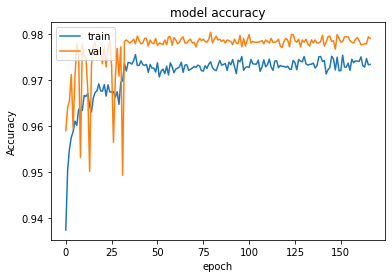

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Plot confusion matrix

In [25]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

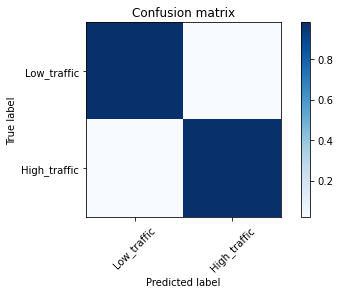

In [26]:
#X = [X_test, Y_test, np.transpose(IPI_test)]
X = [X_test, Y_test, np.transpose(IPI_test), np.transpose(col_test)]

test_Y_hat = model.predict(X, batch_size=batch_size)
conf = np.zeros([len(classes),len(classes)])
confnorm1 = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(Label_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm1[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm1, labels=classes)
    

In [27]:
print(confnorm1)

[[0.98081454 0.01918546]
 [0.0227798  0.9772202 ]]


In [28]:
IPI.shape

(20000,)

In [29]:
y_pred=model.predict([X_test, Y_test, np.transpose(IPI_test), np.transpose(col_test)])

In [30]:
y_pred = np.argmax(y_pred, axis=-1)

In [31]:
Label_test = np.argmax(Label_test, axis=-1)

In [32]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Label_test, y_pred))

Accuracy: 0.979


### load trained model


In [33]:
from tensorflow.keras.models import load_model

In [34]:
model = load_model('model_LTE_WiFi_coexistance_including_newfeature.h5')

OSError: SavedModel file does not exist at: model_LTE_WiFi_coexistance_including_newfeature.h5/{saved_model.pbtxt|saved_model.pb}

In [ ]:
batch_size = 512

In [ ]:
import pandas as pd
df = pd.read_csv("dataset_test.csv", header=None) 

In [ ]:
df

In [ ]:
y_actual = df.iloc[:,54].to_numpy()

In [ ]:
y_actual

In [ ]:
X_test = df.iloc[:,0:26].to_numpy()
Y_test = df.iloc[:,26:52].to_numpy()
IPI = df.iloc[:,52].to_numpy()
col = df.iloc[:,53].to_numpy()

In [ ]:
Y_test.shape

In [ ]:
X_test.shape

In [ ]:
Y_test.shape

In [ ]:
IPI.shape

In [ ]:
y_pred=model.predict([X_test, Y_test, np.transpose(IPI), np.transpose(col)])

In [ ]:
y_pred

In [ ]:
y_pred = np.argmax(y_pred, axis=-1)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_actual, y_pred))